# How to Train YOLOv8 Object Detection on a Custom Dataset

Meituan YOLOv6 is a cutting-edge object detector that offers remarkable balance between speed and accuracy, making it a popular choice for real-time applications. This model introduces several notable enhancements on its architecture and training scheme, including the implementation of a Bi-directional Concatenation (BiC) module, an anchor-aided training (AAT) strategy, and an improved backbone and neck design for state-of-the-art accuracy on the COCO dataset.

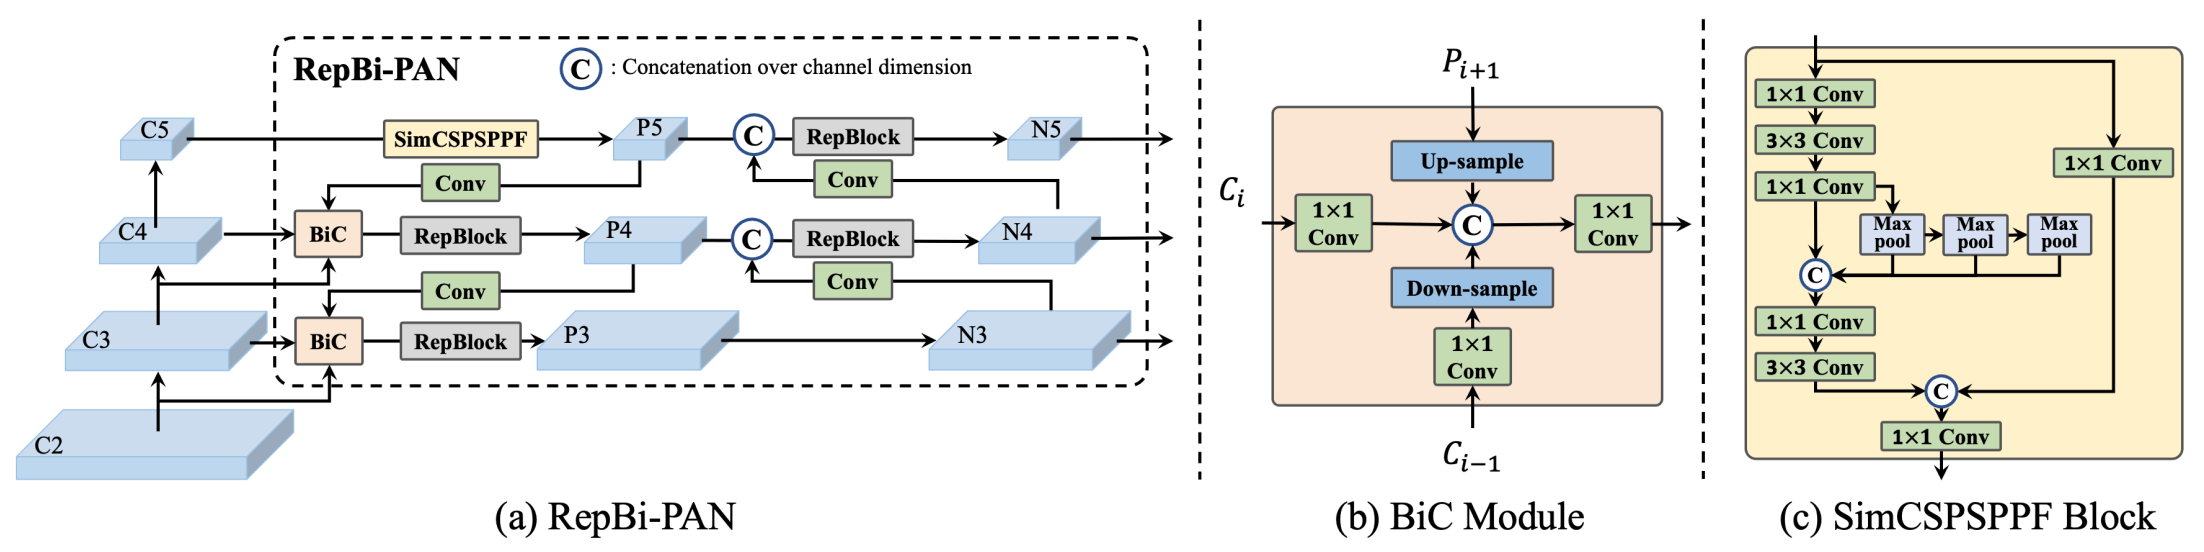

# Before start
Let's make sure that we have access to GPU. We can use nvidia-smi command to do that. 

In [1]:
!nvidia-smi

Mon Apr 22 13:09:34 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.171.04             Driver Version: 535.171.04   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2080 ...    Off | 00000000:09:00.0  On |                  N/A |
|  0%   44C    P8              26W / 250W |    636MiB /  8192MiB |     16%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/home/tumwfml-ubunt6/OD_models/yolov6


# Install YOLOv8
⚠️ Overview of YOLOv6. Model architecture diagram showing the redesigned network components and training strategies that have led to significant performance improvements. (a) The neck of YOLOv6 (N and S are shown). Note for M/L, RepBlocks is replaced with CSPStackRep. (b) The structure of a BiC module. (c) A SimCSPSPPF block. (source).

In [3]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 7972MiB)
Setup complete ✅ (12 CPUs, 31.3 GB RAM, 69.1/456.9 GB disk)


In [7]:
from ultralytics import YOLO

from IPython.display import display, Image

# Build a YOLOv6n model from scratch
model = YOLO('yolov6n.yaml')

# Display model information (optional)
model.info()

YOLOv6n summary: 195 layers, 4500080 parameters, 4500064 gradients, 13.1 GFLOPs


(195, 4500080, 4500064, 13.1051008)

# 💻 CLI
yolo mode=predict runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to runs/predict

In [10]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov6n.yaml conf=0.25 source='/home/tumwfml-ubunt6/OD_models/Test images/dog-2.jpeg' save=True

/home/tumwfml-ubunt6/OD_models/yolov6
/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.2.1) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 7972MiB)
YOLOv6n summary (fused): 142 layers, 4495392 parameters, 52496 gradients, 13.0 GFLOPs

image 1/1 /home/tumwfml-ubunt6/OD_models/Test images/dog-2.jpeg: 640x384 (no detections), 48.3ms
Speed: 1.4ms preprocess, 48.3ms inference, 85.2ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


/home/tumwfml-ubunt6/OD_models/yolov6


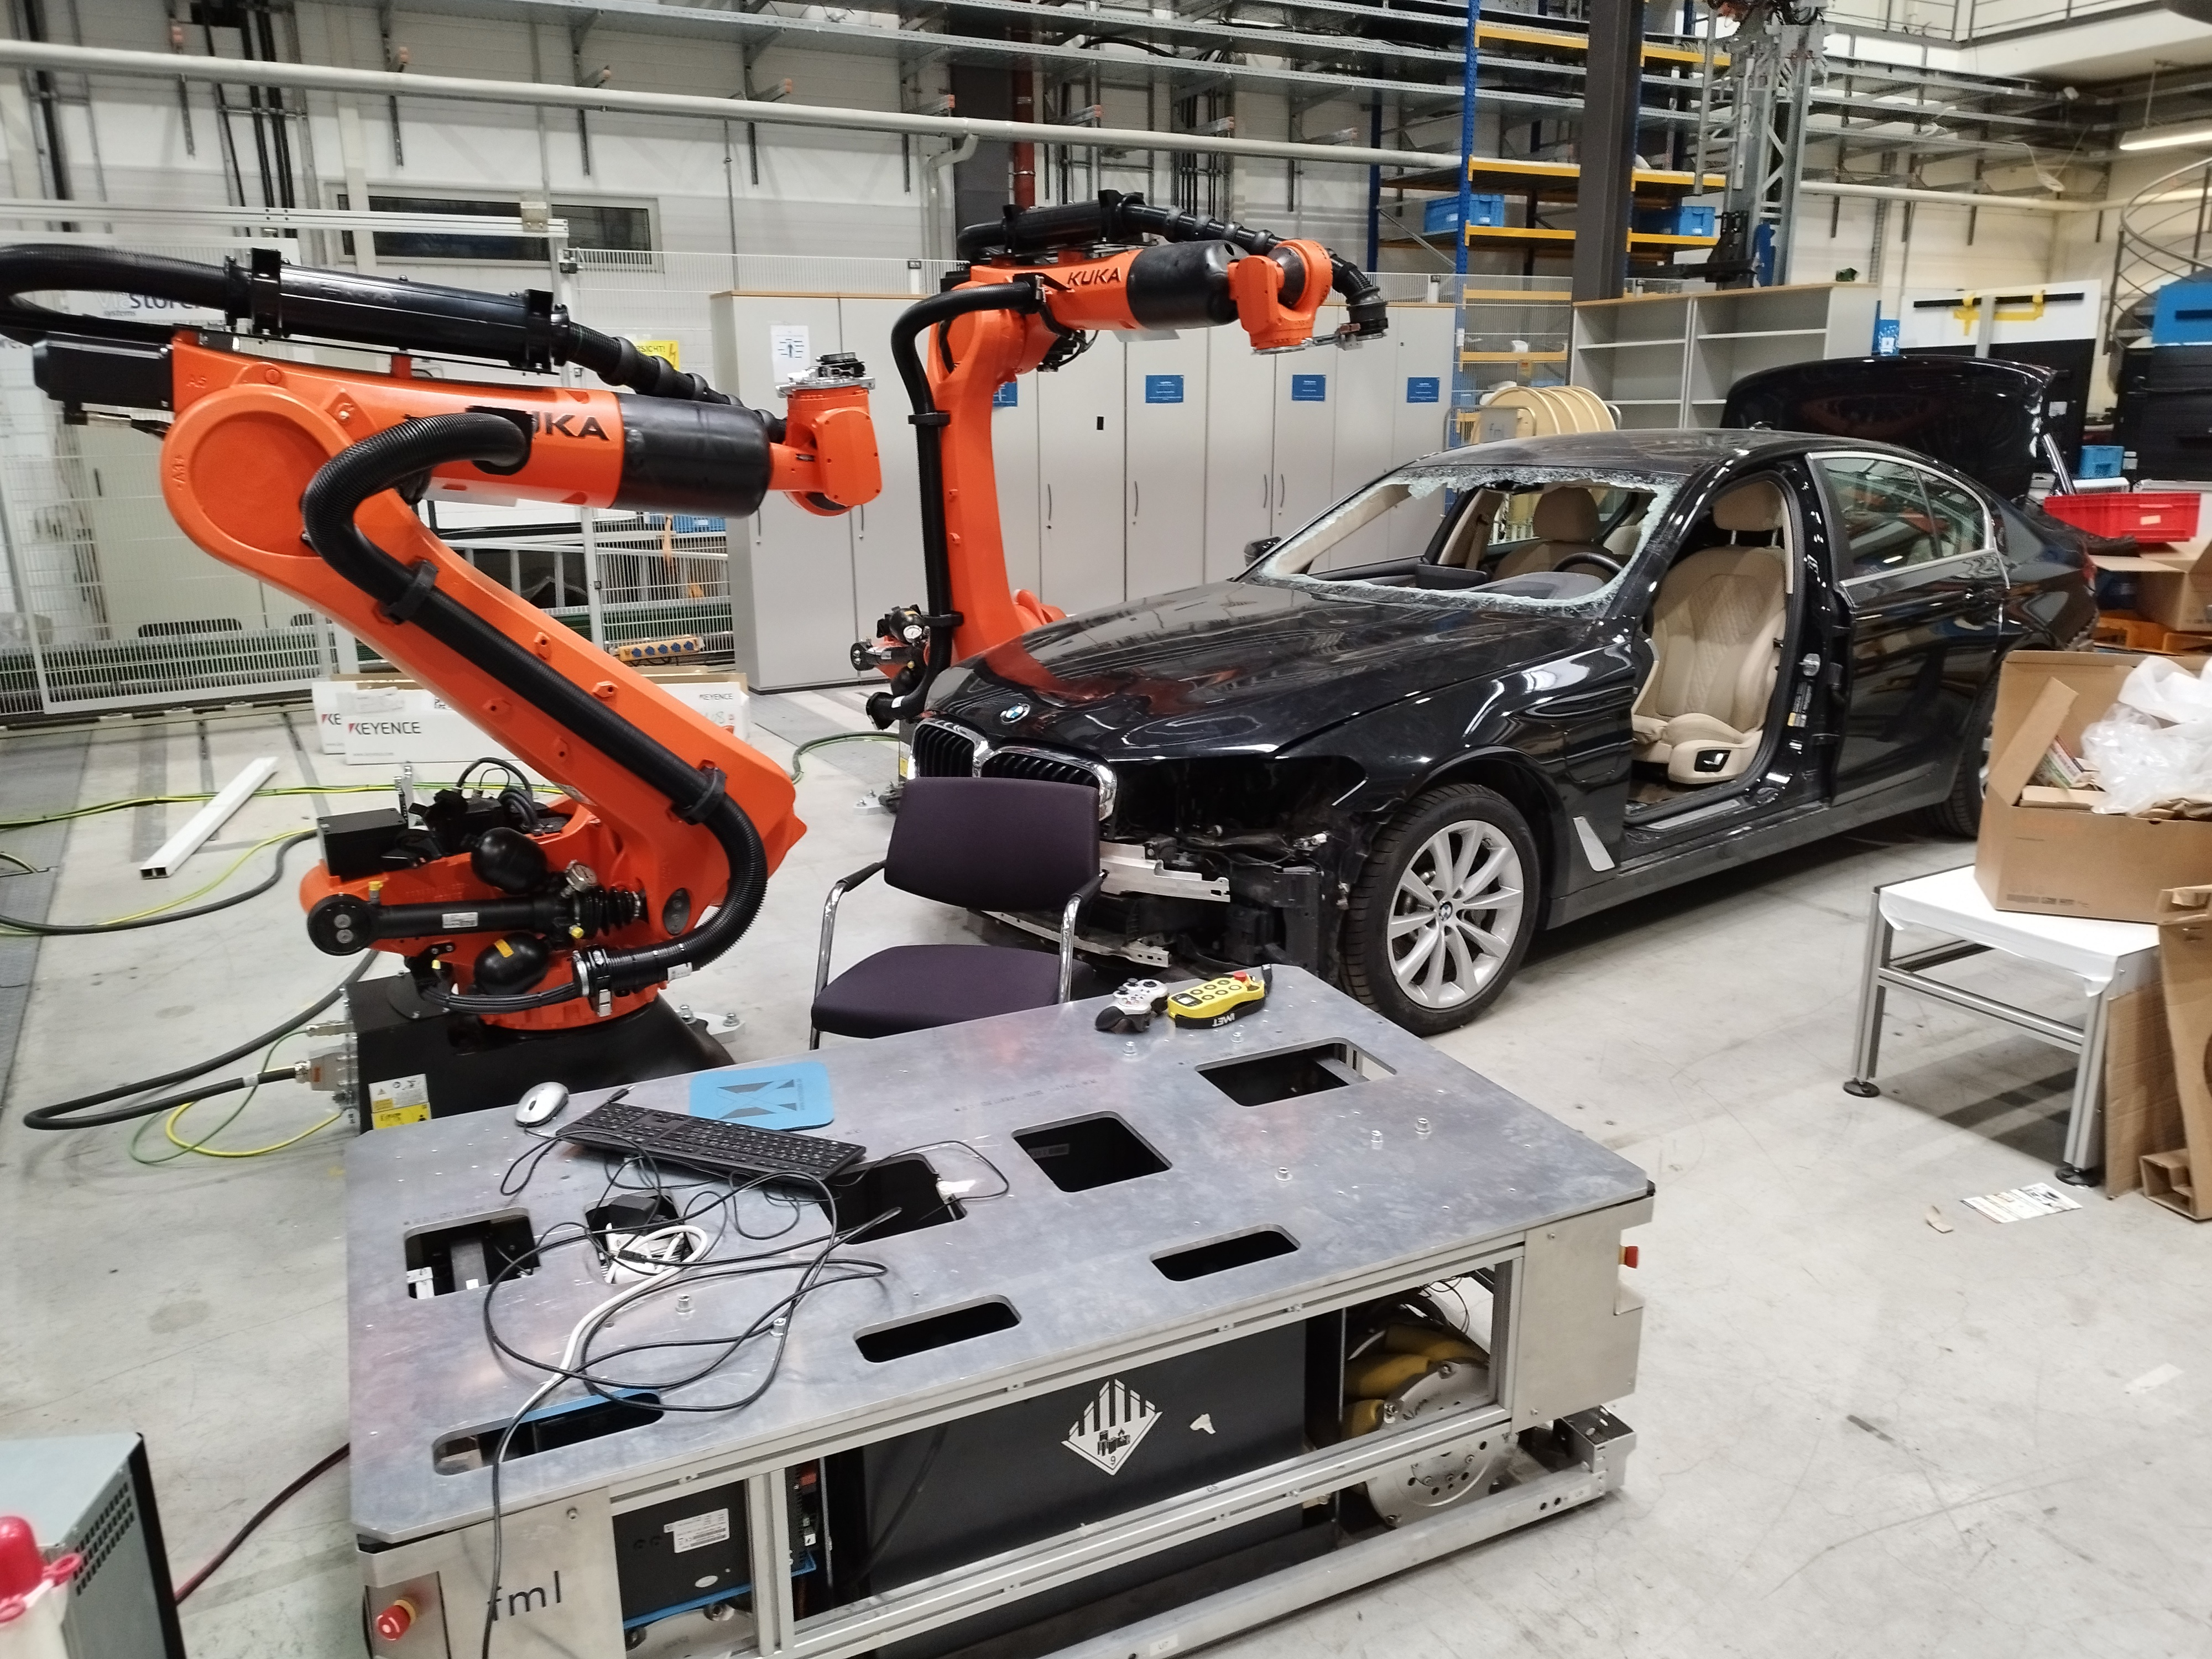

In [6]:
%cd {HOME}
Image(filename='/home/tumwfml-ubunt6/OD_models/yolov6/runs/detect/predict/Kuka_0.jpg', height=600)

In [6]:
from roboflow import Roboflow
rf = Roboflow(api_key="tdaunqWuLcixnXI8q8cM")

In [7]:
project = rf.workspace("loco-fml").project("loco-fml")
version = project.version(6)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.2, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to LOCO-fml-6 in yolov8:: 100%|██████████| 16484/16484 [00:02<00:00, 6265.25it/s]


In [15]:
%cd {HOME}
data_path= "/home/tumwfml-ubunt6/OD_models/yolov6/LOCO-fml-6/data.yaml"
print (data_path)

/home/tumwfml-ubunt6/OD_models/yolov6
/home/tumwfml-ubunt6/OD_models/yolov6/LOCO-fml-6/data.yaml


/home/tumwfml-ubunt6/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [17]:
# Train the model on the LOCO dataset for 25 epochs
%cd {HOME}
results = model.train(data=data_path, epochs=25, imgsz=640, plots=True)

/home/tumwfml-ubunt6/OD_models/yolov6
New https://pypi.org/project/ultralytics/8.2.10 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 7972MiB)
engine/trainer: task=detect, mode=train, model=yolov6n.yaml, data=/home/tumwfml-ubunt6/OD_models/yolov6/LOCO-fml-6/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment

/home/tumwfml-ubunt6/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Overriding model.yaml nc=80 with nc=5
activation: nn.ReLU()

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  2     18560  ultralytics.nn.modules.conv.Conv             [32, 32, 3, 1]                
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  4    147968  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 1]                
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  6    886272  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 1]              
  7                  -1  1 

train: Scanning /home/tumwfml-ubunt6/OD_models/yolov6/LOCO-fml-6/train/labels... 7223 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7223/7223 [00:04<00:00, 1607.47it/s]


train: New cache created: /home/tumwfml-ubunt6/OD_models/yolov6/LOCO-fml-6/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /home/tumwfml-ubunt6/OD_models/yolov6/LOCO-fml-6/valid/labels... 760 images, 0 backgrounds, 0 corrupt: 100%|██████████| 760/760 [00:00<00:00, 820.37it/s]


val: New cache created: /home/tumwfml-ubunt6/OD_models/yolov6/LOCO-fml-6/valid/labels.cache
Plotting labels to runs/detect/train10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 53 weight(decay=0.0), 62 weight(decay=0.0005), 61 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train10
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      4.72G       3.74      3.509      3.292        171        640: 100%|██████████| 452/452 [00:59<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  4.85it/s]

                   all        760      22037      0.428     0.0461      0.013    0.00399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      4.52G      2.981      2.469      2.227        229        640: 100%|██████████| 452/452 [00:53<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  4.97it/s]


                   all        760      22037      0.303     0.0941     0.0606     0.0166

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      4.41G      2.694      2.202      1.958        142        640: 100%|██████████| 452/452 [00:52<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.15it/s]


                   all        760      22037      0.374      0.133     0.0861     0.0287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      4.59G      2.551      2.053      1.847        396        640: 100%|██████████| 452/452 [00:51<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  4.94it/s]


                   all        760      22037      0.411      0.152      0.117     0.0418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      3.62G      2.447      1.949      1.774        241        640: 100%|██████████| 452/452 [00:51<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.28it/s]


                   all        760      22037      0.274      0.198      0.157     0.0597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      4.56G      2.399      1.872      1.728        360        640: 100%|██████████| 452/452 [00:50<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.32it/s]


                   all        760      22037      0.494      0.208      0.197     0.0751

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      3.41G      2.355      1.827      1.686        214        640: 100%|██████████| 452/452 [00:48<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.63it/s]


                   all        760      22037      0.322      0.277      0.215     0.0822

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      3.85G       2.32      1.783      1.655        180        640: 100%|██████████| 452/452 [00:49<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.77it/s]


                   all        760      22037      0.382       0.23      0.217     0.0859

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25       4.2G      2.278      1.747      1.631        323        640: 100%|██████████| 452/452 [00:48<00:00,  9.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.69it/s]


                   all        760      22037      0.359      0.281      0.241     0.0976

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      4.56G      2.262      1.715      1.607        282        640: 100%|██████████| 452/452 [00:49<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.93it/s]


                   all        760      22037      0.369      0.283      0.248     0.0997

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      3.72G      2.227      1.667       1.58        238        640: 100%|██████████| 452/452 [00:48<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.59it/s]


                   all        760      22037      0.399      0.291      0.264      0.109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      4.92G      2.206      1.645       1.58        221        640: 100%|██████████| 452/452 [00:48<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.47it/s]


                   all        760      22037      0.337      0.333      0.286      0.114

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25       4.8G      2.203      1.627      1.561        295        640: 100%|██████████| 452/452 [00:48<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.68it/s]


                   all        760      22037      0.396      0.305      0.289       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      3.44G      2.173      1.592       1.55        148        640: 100%|██████████| 452/452 [00:48<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.82it/s]


                   all        760      22037      0.411      0.331      0.316      0.131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      4.87G       2.16       1.57      1.529        200        640: 100%|██████████| 452/452 [00:49<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.80it/s]


                   all        760      22037      0.449      0.316      0.323      0.142
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      4.97G      2.123      1.527      1.539        103        640: 100%|██████████| 452/452 [00:47<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.69it/s]


                   all        760      22037      0.441      0.336      0.336      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25       4.5G      2.105      1.492      1.527        163        640: 100%|██████████| 452/452 [00:46<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.87it/s]


                   all        760      22037      0.474      0.359      0.361      0.155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      3.01G      2.087      1.474      1.516        229        640: 100%|██████████| 452/452 [00:45<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.87it/s]


                   all        760      22037      0.478      0.318      0.345       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25       3.8G      2.075      1.449      1.504        191        640: 100%|██████████| 452/452 [00:46<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.88it/s]


                   all        760      22037      0.499      0.349      0.369      0.163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      2.95G      2.059      1.424      1.493        260        640: 100%|██████████| 452/452 [00:46<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.83it/s]


                   all        760      22037      0.482       0.38      0.377      0.167

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      3.14G      2.052      1.417      1.491        130        640: 100%|██████████| 452/452 [00:45<00:00,  9.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.88it/s]


                   all        760      22037      0.517       0.39        0.4       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      3.22G      2.042      1.393      1.478        319        640: 100%|██████████| 452/452 [00:45<00:00,  9.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.90it/s]


                   all        760      22037      0.521      0.392      0.413      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.07G      2.027      1.375       1.47        241        640: 100%|██████████| 452/452 [00:45<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.81it/s]


                   all        760      22037       0.52      0.417      0.415       0.19

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      3.35G      2.016      1.361      1.463        177        640: 100%|██████████| 452/452 [00:46<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.97it/s]


                   all        760      22037      0.529      0.412      0.429      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      4.66G      2.005      1.351      1.458        173        640: 100%|██████████| 452/452 [00:46<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.86it/s]


                   all        760      22037      0.547      0.409      0.432        0.2

25 epochs completed in 0.374 hours.
Optimizer stripped from runs/detect/train10/weights/last.pt, 8.7MB
Optimizer stripped from runs/detect/train10/weights/best.pt, 8.7MB

Validating runs/detect/train10/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 7972MiB)
YOLOv6n summary (fused): 142 layers, 4234239 parameters, 0 gradients, 11.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.12it/s]


                   all        760      22037      0.549      0.412      0.433        0.2
              forklift        760        103      0.455      0.214      0.239      0.112
                pallet        760      17428      0.594      0.571      0.579      0.245
          pallet_truck        760        478      0.543      0.331      0.349      0.167
    small_load_carrier        760       3008      0.622      0.457      0.507      0.216
              stillage        760       1020      0.531      0.487      0.492      0.259
Speed: 0.4ms preprocess, 1.1ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train10


In [18]:
!ls {HOME}/runs/detect/train4/

args.yaml			 R_curve.png	      train_batch6782.jpg
confusion_matrix_normalized.png  results.csv	      val_batch0_labels.jpg
confusion_matrix.png		 results.png	      val_batch0_pred.jpg
F1_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
labels_correlogram.jpg		 train_batch1.jpg     val_batch1_pred.jpg
labels.jpg			 train_batch2.jpg     val_batch2_labels.jpg
P_curve.png			 train_batch6780.jpg  val_batch2_pred.jpg
PR_curve.png			 train_batch6781.jpg  weights


/home/tumwfml-ubunt6/OD_models/yolov6


/home/tumwfml-ubunt6/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


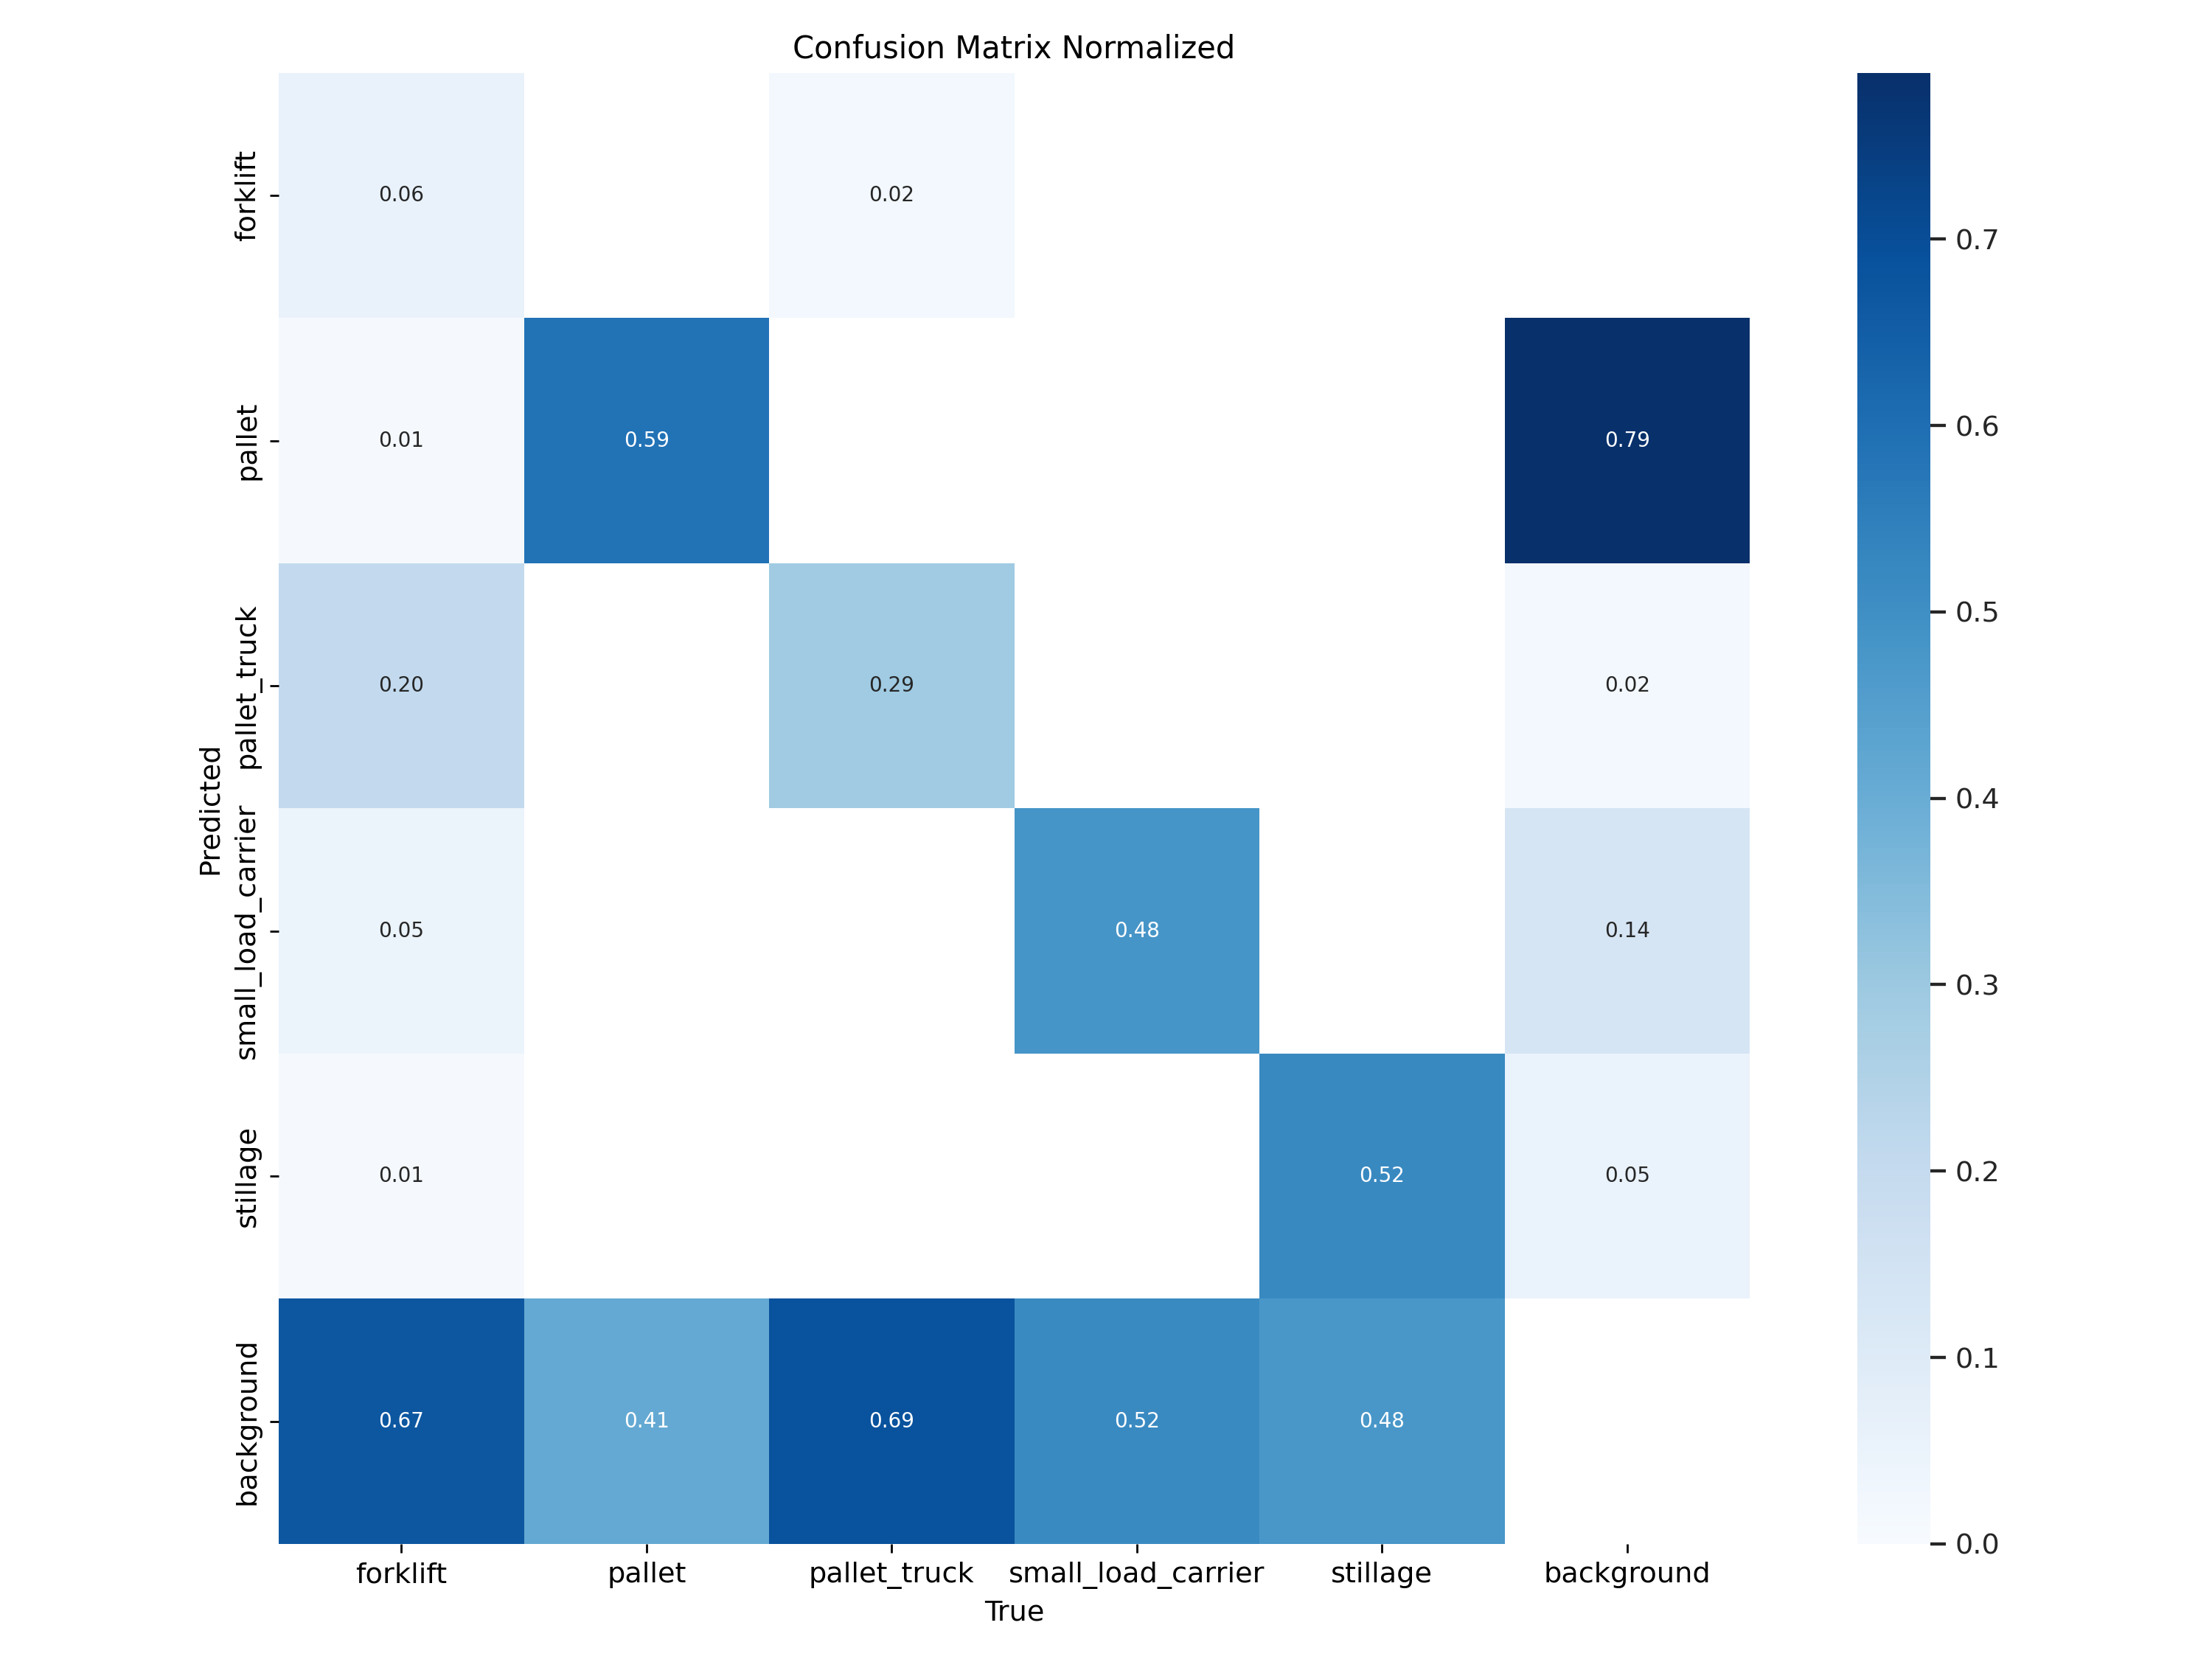

In [19]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix_normalized.png', width=600)

/home/tumwfml-ubunt6/OD_models/yolov6


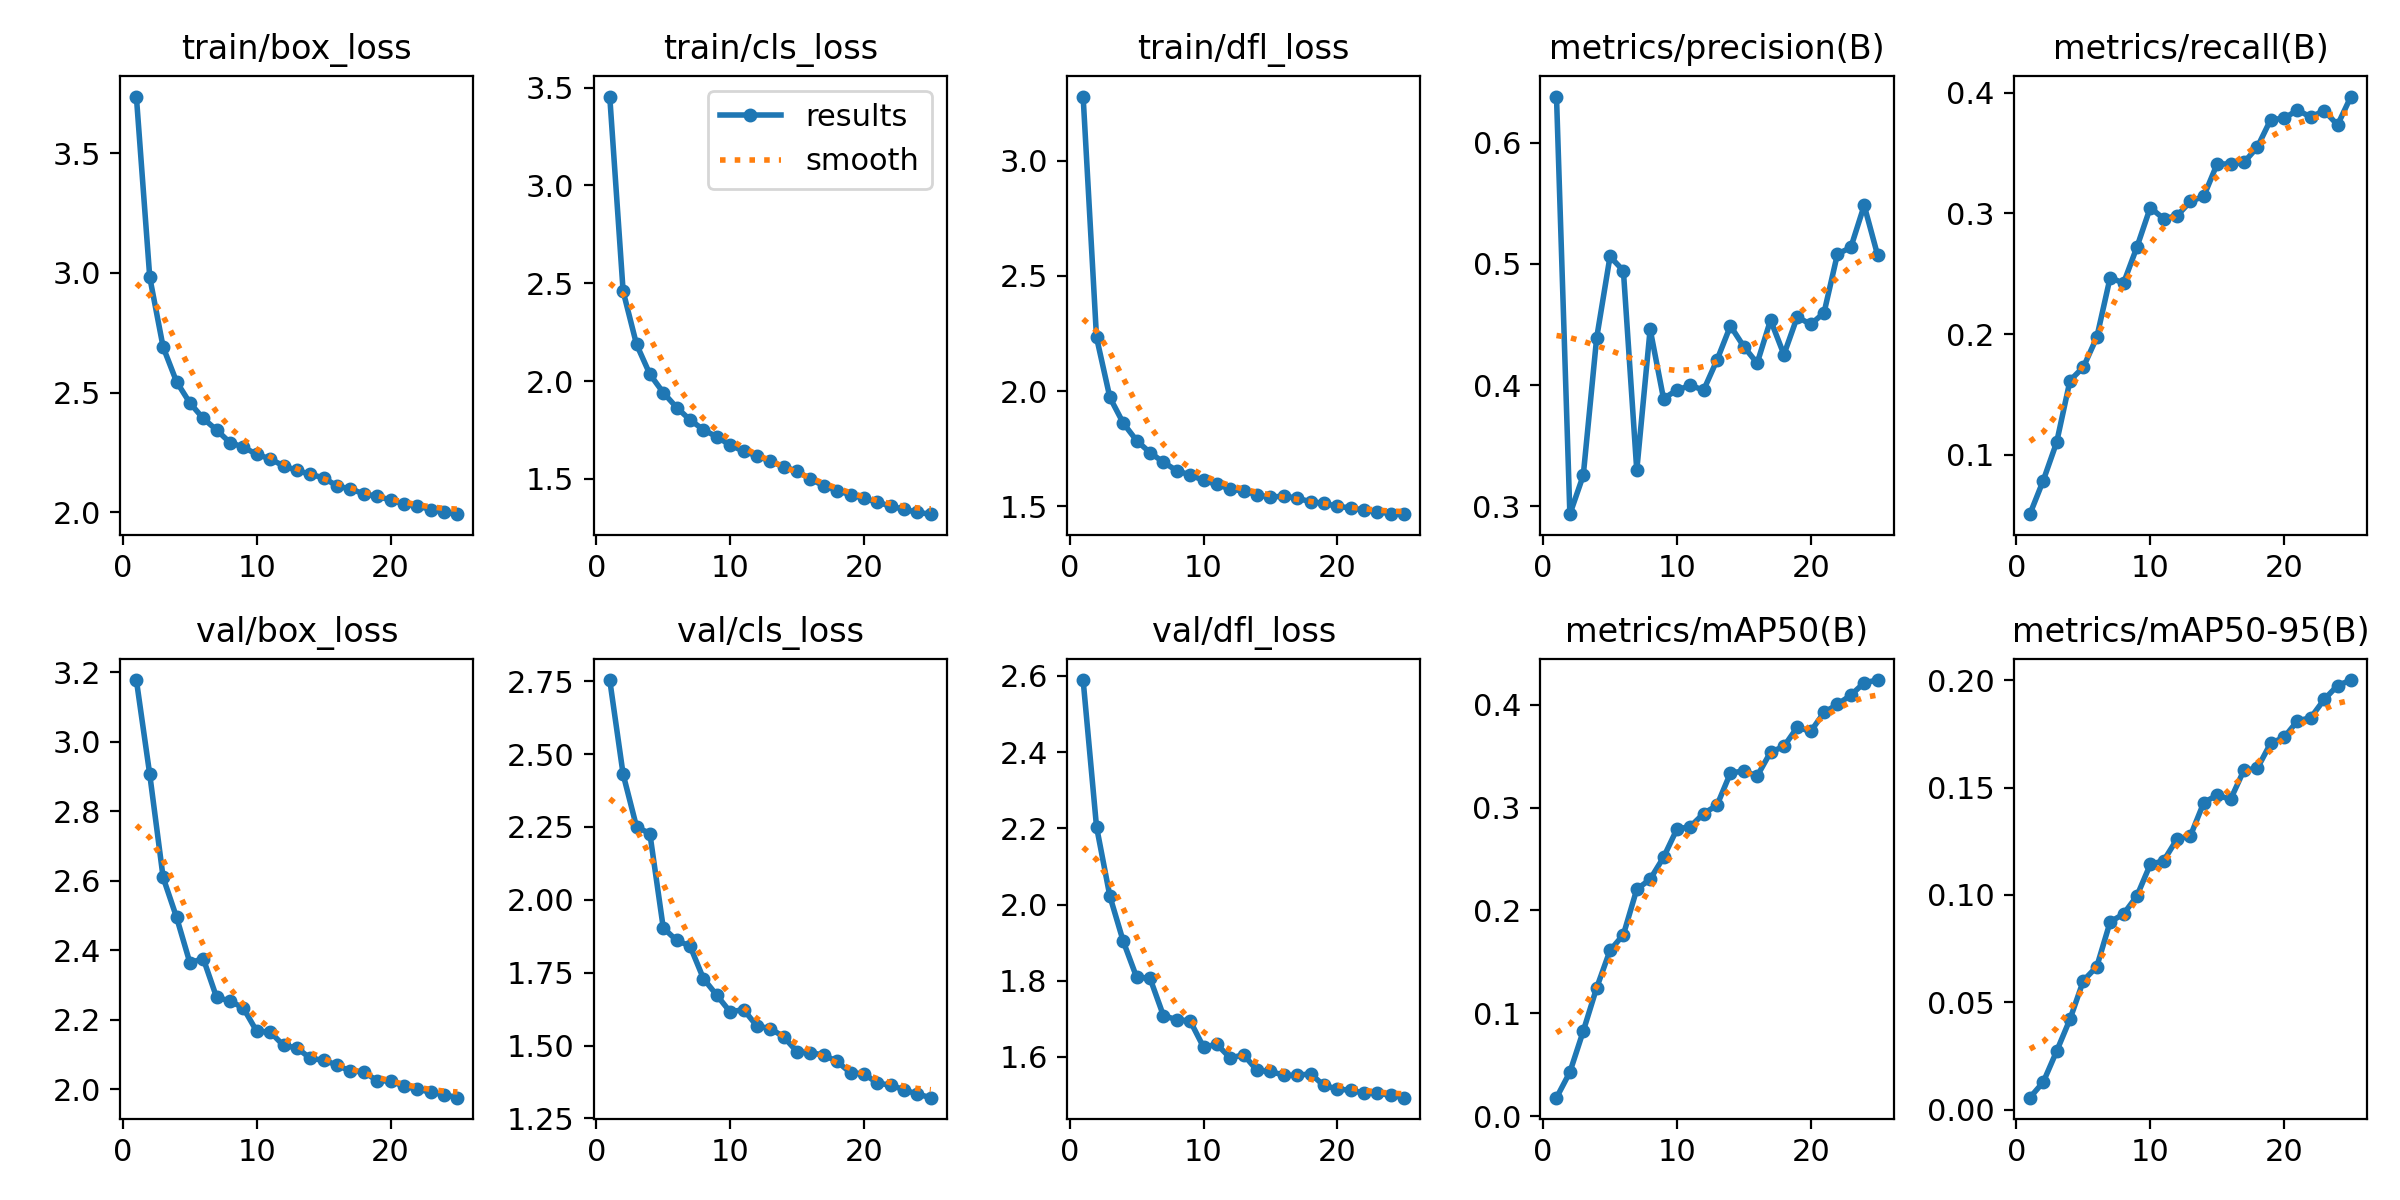

In [25]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

# Validate Custom Model

In [26]:
%cd {HOME}

!yolo task=detect mode=val model=/home/tumwfml-ubunt6/OD_models/yolov6/runs/detect/train10/weights/best.pt data=/home/tumwfml-ubunt6/OD_models/yolov6/LOCO-fml-6/data.yaml

/home/tumwfml-ubunt6/OD_models/yolov6
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 7972MiB)
YOLOv6n summary (fused): 142 layers, 4234239 parameters, 0 gradients, 11.8 GFLOPs
val: Scanning /home/tumwfml-ubunt6/OD_models/yolov6/LOCO-fml-6/valid/labels.cach
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        760      22037      0.549       0.41      0.433        0.2
              forklift        760        103      0.436      0.204      0.234      0.111
                pallet        760      17428      0.597       0.57      0.581      0.245
          pallet_truck        760        478      0.551      0.331      0.349      0.167
    small_load_carrier        760       3008      0.623      0.456      0.507      0.217
              stillage        760       1020      0.537      0.489      0.496      0.259
Speed: 0.5ms preprocess, 2.6ms inference, 0.0ms loss, 5.9ms postprocess per im

# Inference with Custom Model

In [28]:
%cd {HOME}
!yolo task=detect mode=predict model=/home/tumwfml-ubunt6/OD_models/yolov6/runs/detect/train10/weights/best.pt conf=0.25 source=/home/tumwfml-ubunt6/OD_models/yolov6/LOCO-fml-6/test/images save=True

/home/tumwfml-ubunt6/OD_models/yolov6
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 7972MiB)
YOLOv6n summary (fused): 142 layers, 4234239 parameters, 0 gradients, 11.8 GFLOPs

image 1/253 /home/tumwfml-ubunt6/OD_models/yolov6/LOCO-fml-6/test/images/1014902-4606_jpg.rf.cb03e207cfe7279bccb27d78eaeb8a69.jpg: 640x640 12 pallets, 2 small_load_carriers, 5.3ms
image 2/253 /home/tumwfml-ubunt6/OD_models/yolov6/LOCO-fml-6/test/images/1030236-4329_jpg.rf.2437666ca5c20dce64a9845a65f7af2a.jpg: 640x640 9 pallets, 4 small_load_carriers, 5.1ms
image 3/253 /home/tumwfml-ubunt6/OD_models/yolov6/LOCO-fml-6/test/images/1111168-8003_jpg.rf.411282dfc8786610b5d44aba3b67a054.jpg: 640x640 1 forklift, 8 pallets, 4 pallet_trucks, 4.9ms
image 4/253 /home/tumwfml-ubunt6/OD_models/yolov6/LOCO-fml-6/test/images/1189535-3423_jpg.rf.1b6acceed3619802ebf09b06294ed13c.jpg: 640x640 13 pallets, 3 pallet_trucks, 4.8ms
image 5/253 /home/tumwfml-ubunt6/OD_models/yolov6/LOCO-

 NOTE: Let's take a look at few results.

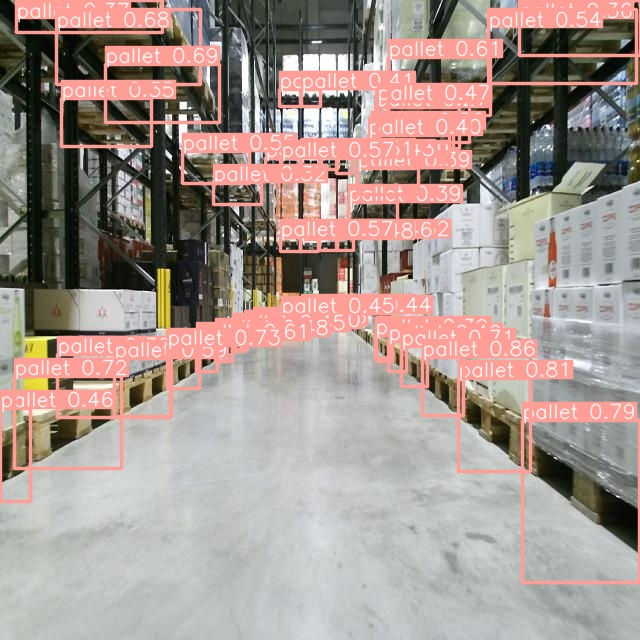

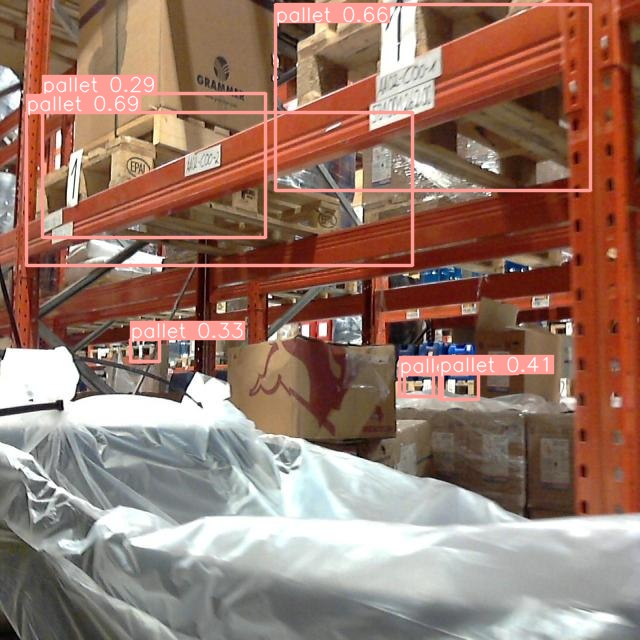

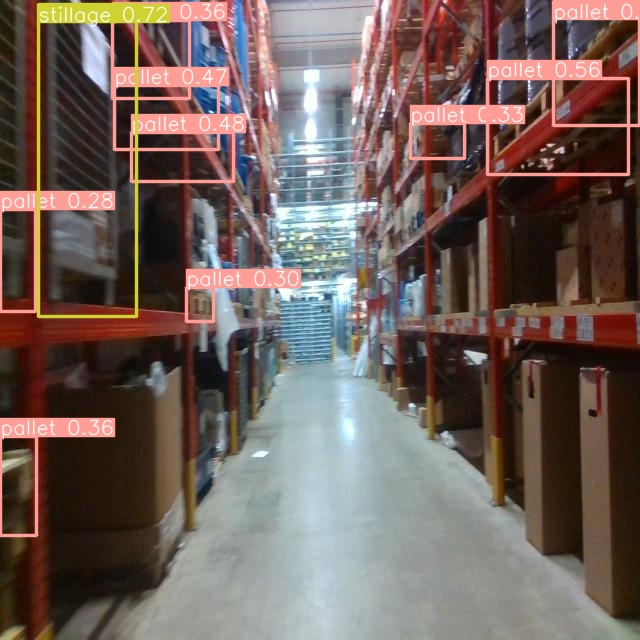

In [32]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict4/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")